<a href="https://colab.research.google.com/github/antoniogss/notebooks_guia_pratico_sc/blob/main/notebook_desempenho_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

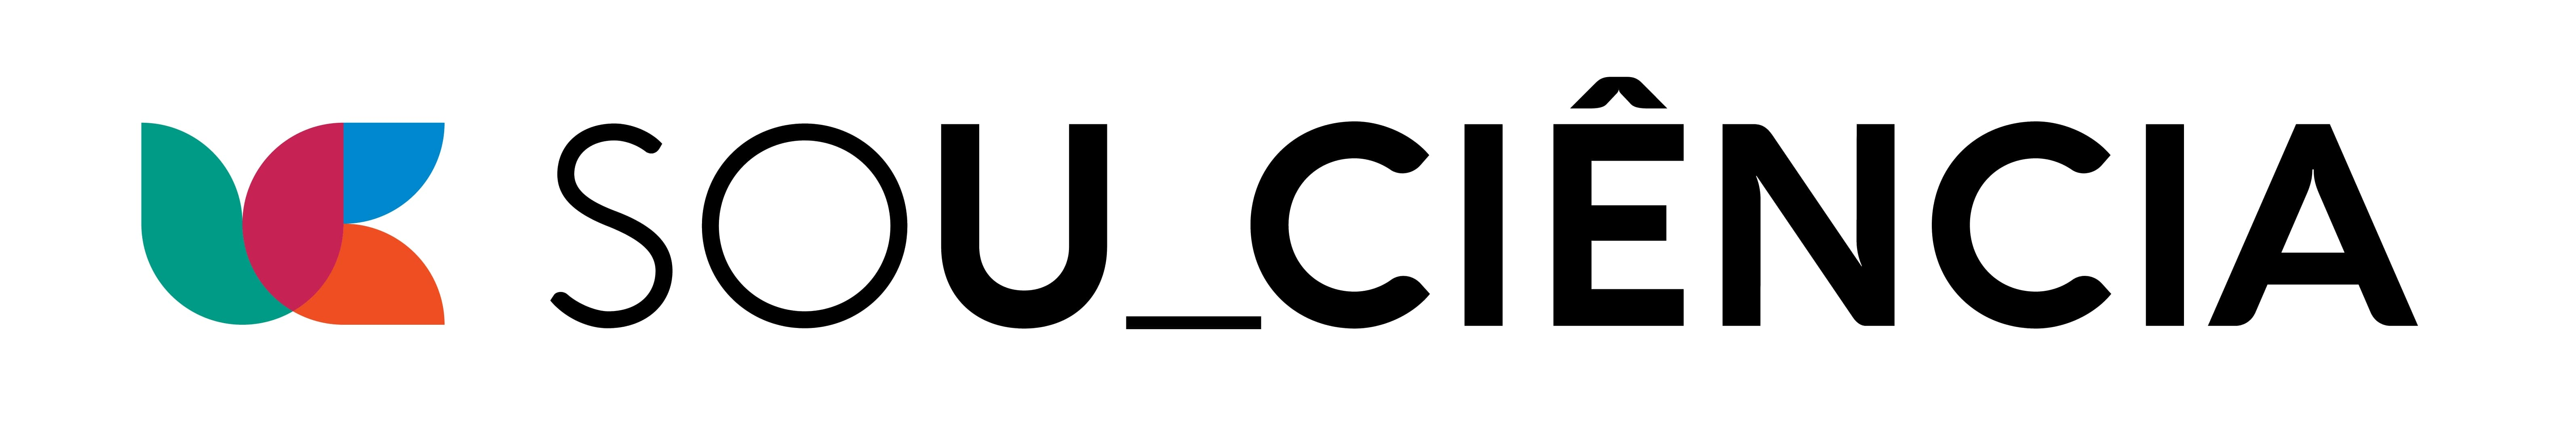

**Coordenação Geral:** \\
Soraya Soubhi Smaili (UNIFESP)

**Coordenação de Pesquisa:** \\
Maria Angélica Pedra Minhoto (UNIFESP) \\
Pedro Arantes (UNIFESP) 

**Equipe de Dados** \\

**Coordenação:** \\
Thaís Cavalcante Martins 

**Pesquisadora Colaboradora:** \\
Daniela Leal Musa (UNIFESP)

**Equipe Técnica:** 

Alexsandro Cardoso Carvalho \\
Antonio Guerreiro Silva Serrano \\
Ecila Alves de Oliveira Migliori \\
Fabiana Yumi Sato Kayanoki \\
Meyrele Torres Nascimento \\
Ricardo Ireno dos Santos \\


**Autor: Antonio Guerreiro Silva Serrano**

# Recomendações de Desempenho - Python

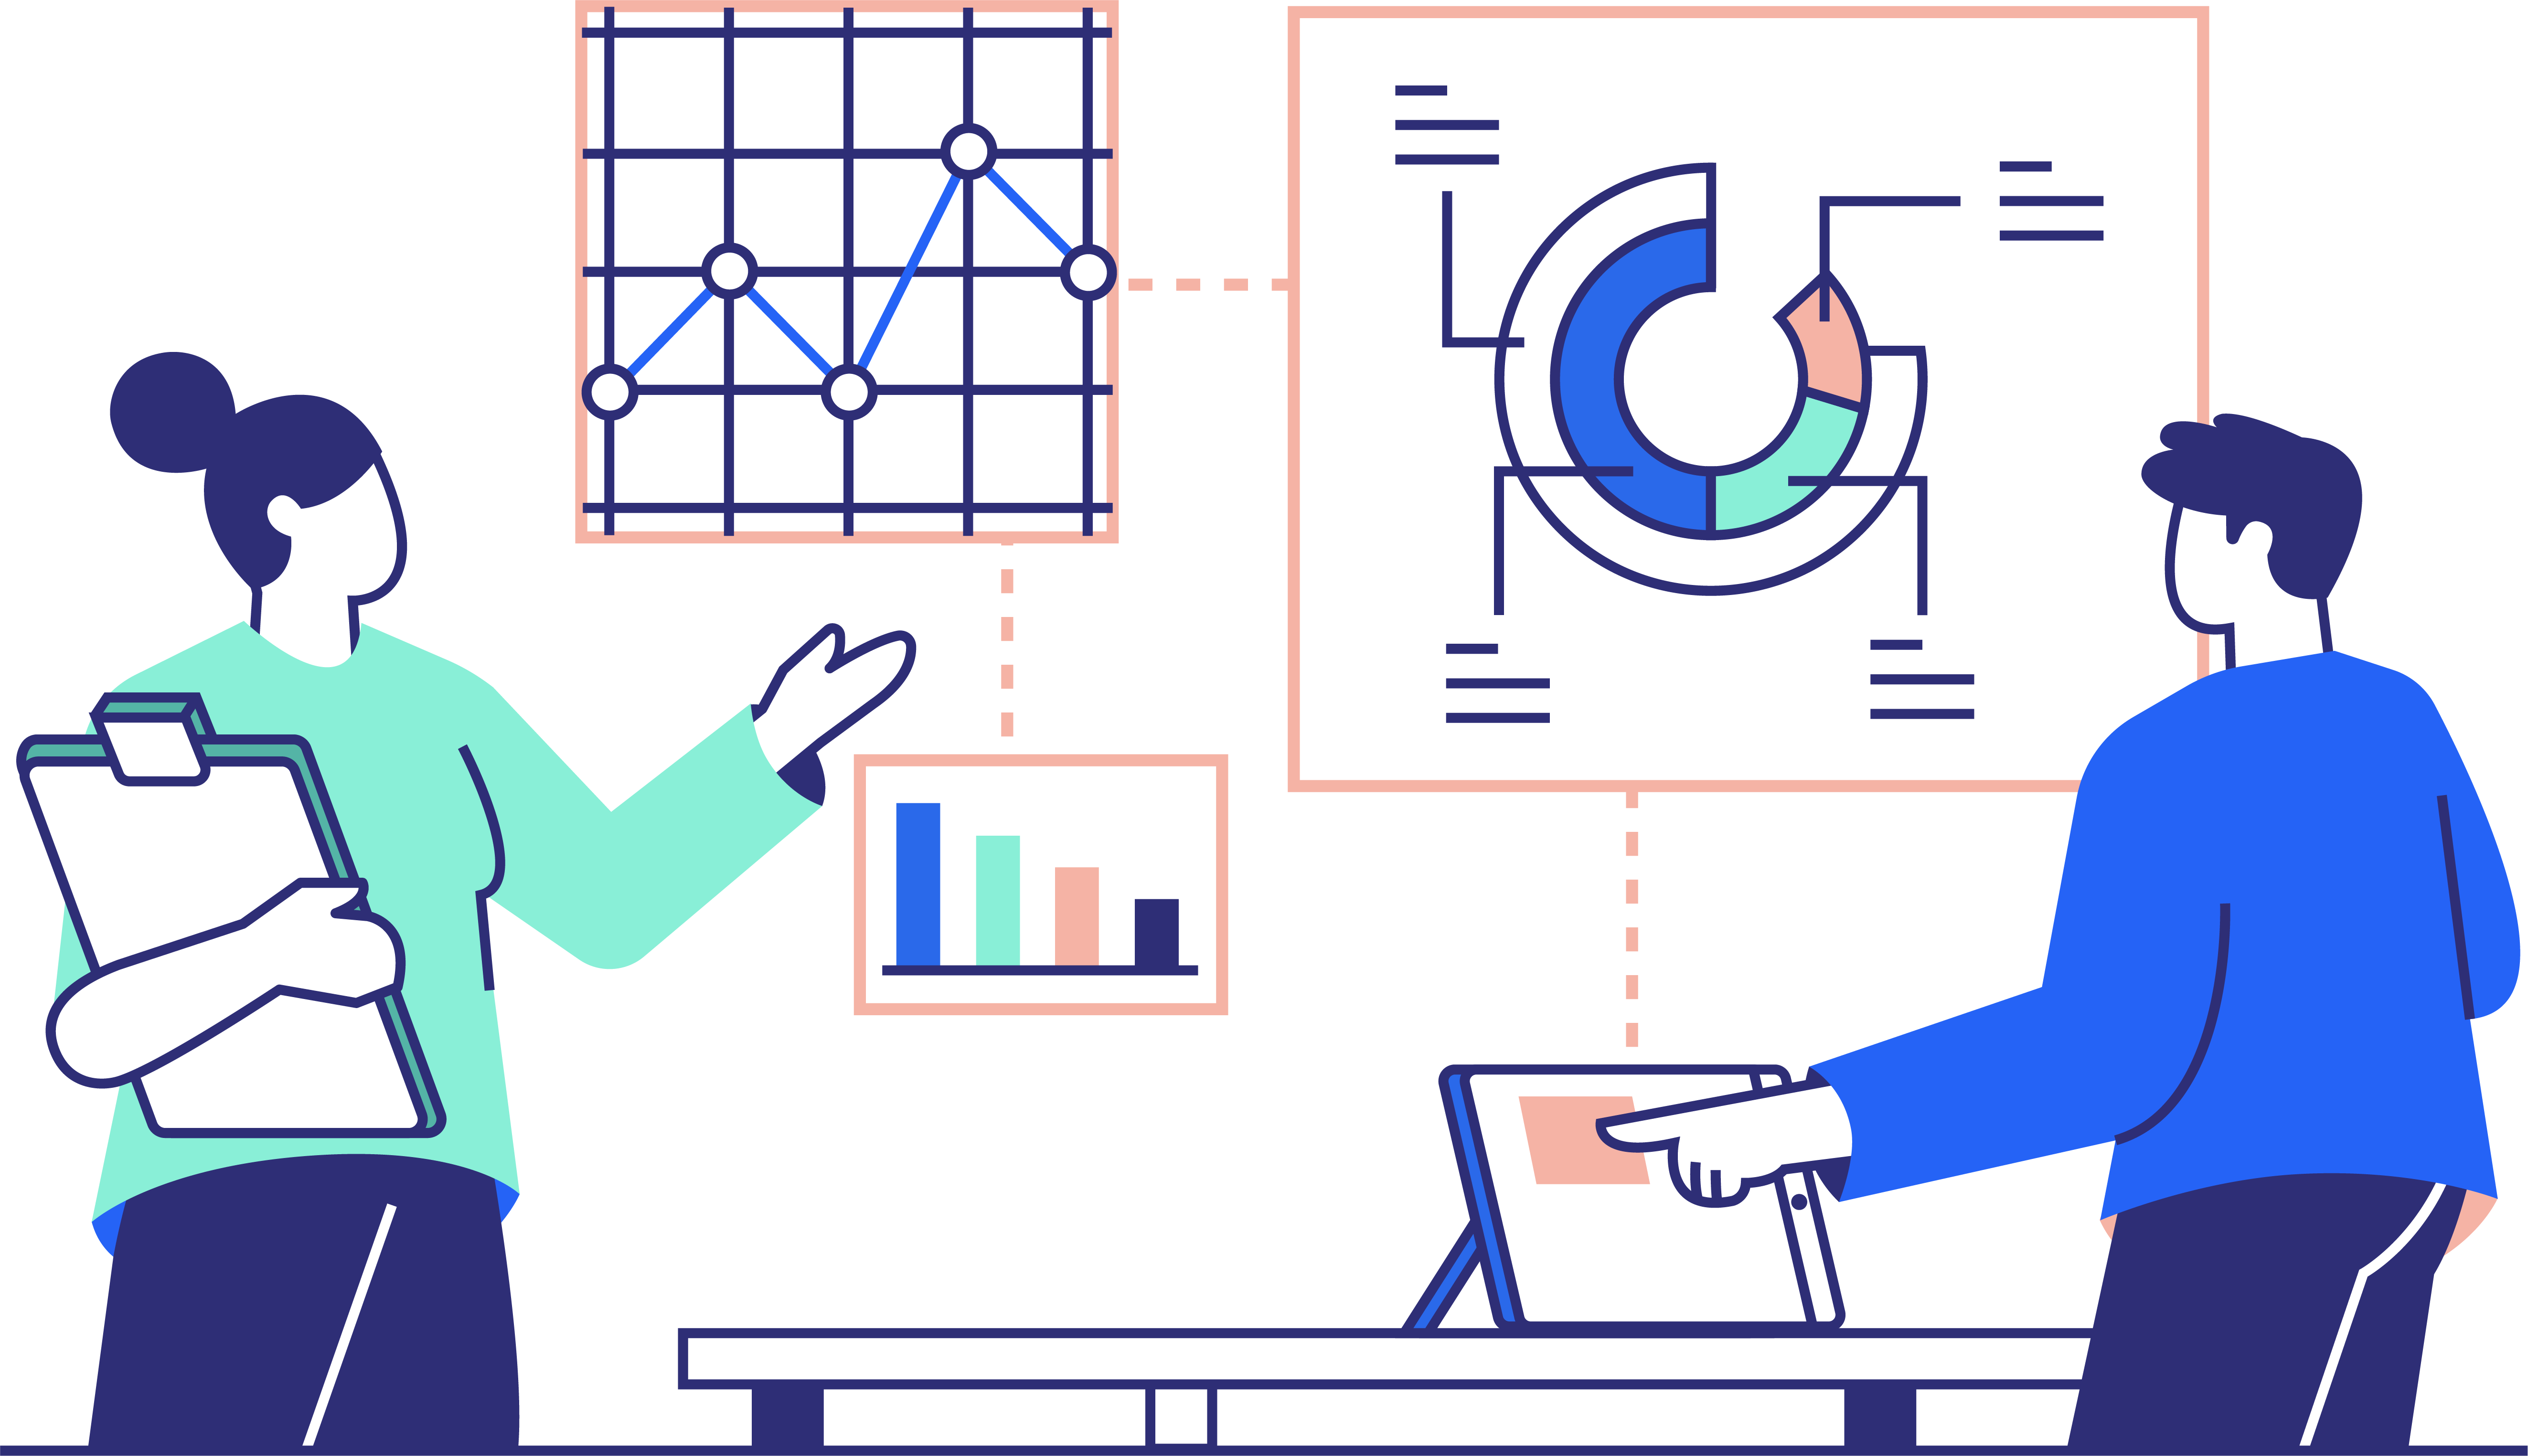

## Introdução

**Como lidar com arquivos muito grandes?**

Arquivos muito grandes, da ordem de GB, podem ser um desafio para muitos cientistas de dados, especialmente aqueles que não possuem uma máquina robusta. A análise de dados envolve a manipulação de grandes conjuntos de dados, que muitas vezes são armazenados em arquivos CSV ou outros formatos. No entanto, carregar um arquivo grande na memória pode levar a problemas de desempenho e até mesmo travamentos no computador. Além disso, alguns *softwares* de análise de dados podem não ser capazes de lidar com conjuntos de dados grandes, resultando em erros ou resultados imprecisos.

Entretanto, existem diversas técnicas e soluções disponíveis para minimizar os problemas de desempenho e evitar travamentos no computador. Com a utilização de técnicas de leitura em lotes, otimização de código e serviços de processamento em nuvem, é possível realizar análises de dados complexas de forma eficiente e sem comprometer a qualidade dos resultados.

Nesta demonstração, utilizou-se o banco de dados do Censo da Educação Superior de Alunos do SoU_Ciência referente ao ano de 2019.

O Censo da Educação Superior de Alunos é uma pesquisa realizada pelo Instituto Nacional de Estudos e Pesquisas Educacionais Anísio Teixeira (INEP) que tem como objetivo coletar informações sobre a educação superior no Brasil. Essa pesquisa é realizada anualmente e fornece dados importantes sobre o perfil dos alunos matriculados em cursos de graduação e pós-graduação, bem como informações sobre as instituições de ensino superior em todo o país. Esses dados podem ser utilizados para diversas finalidades, como a análise do mercado de trabalho, planejamento de políticas públicas de educação e pesquisa acadêmica.

## 1. Preparando o ambiente de programação em Python

**1.1 Importando as bibliotecas necessárias**

O comando "*import*" no Python é usado para importar módulos ou bibliotecas de código que contêm funções, classes e variáveis úteis para um programa em particular. Ele permite que os programadores reutilizem o código já existente em seus próprios projetos, economizando tempo e esforço na criação de novas funcionalidades. Para importar um módulo, basta digitar "import nome_do_módulo" no início do código.

In [ ]:
# Bibliotecas Python 

'''
Importa a biblioteca pandas e 
a renomeia como 'pd'
'''
import pandas as pd

'''
Importa a biblioteca numpy e 
a renomeia como 'np'
'''
import numpy as np

'''
Importa a biblioteca google.colab e 
a renomeia como 'gc'
'''
import google.colab as gc

'''
Importa a biblioteca math
'''
import math

'''
Importa a biblioteca warnings e 
a renomeia como 'war'
'''
import warnings as war

'''
Importa o módulo 'Path' 
da biblioteca pathlib
'''
from pathlib import Path

'''
Importa a biblioteca tqdm
'''
import tqdm

'''
Importa a biblioteca typer
'''
import typer

'''
Importa a biblioteca time
'''
import time

'''
Ignorar avisos inofensivos
'''
war.filterwarnings('ignore')

**1.2 Download dos dados**

Em sua versão mais recente, os dados estão disponíveis no repositório  (http://  )  e estão  em formato CSV delimitados por ponto e vírgula (sep = ";") . Os arquivos encontram-se compactados (em formato .zip) e devem ser descompactados no seu disco rígido.

## 2. Carregando os dados na forma de um dataframe

**2.1 Arquivo salvo no *Google Drive***

O comando drive.mount é uma maneira simples e conveniente de importar arquivos do Google Drive para o ambiente de desenvolvimento do Google Colab. Com esse recurso, os usuários podem acessar e manipular arquivos armazenados em sua conta do Google Drive sem precisar fazer o upload ou download manualmente.

In [ ]:
# Conexão com o Google Drive

'''
Montando o Google Drive no notebook do Colab. A função drive.mount() é 
utilizada para montar o Google Drive, onde '/content/drive' especifica 
o caminho onde o drive será montado. 
'''

gc.drive.mount('/content/drive')
               
gc.output.clear()

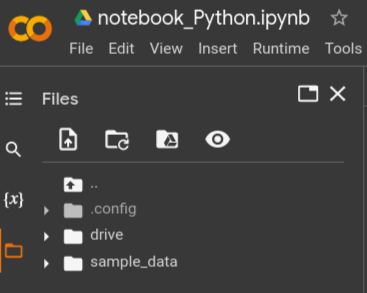

In [ ]:
# Identificar o diretório de trabalho

'''
Comando Linux que retorna o diretório atual em que o notebook está 
sendo executado. O resultado será uma string com o caminho absoluto 
do diretório.
'''

!pwd

/content


In [ ]:
# Verificar o conteúdo do diretório

'''
Comando Linux que lista os arquivos e diretórios presentes no diretório 
atual em que o notebook está sendo executado. O resultado será uma lista 
de strings com o nome dos arquivos e diretórios presentes no diretório atual.
'''

!ls

drive  sample_data


In [ ]:
# Modificar diretório de trabalho

'''
Comando Linux que muda o diretório atual para "./drive/MyDrive/SoU_Ciencia/arquivos/", 
já existente. O resultado será a mudança do diretório atual para o diretório especificado.
'''

%cd ./drive/MyDrive/SoU_Ciencia/arquivos/SoU_censo_aluno/

/content/drive/MyDrive/SoU_Ciencia/arquivos/SoU_censo_aluno


In [ ]:
# Verificar o conteúdo do diretório

'''
Comando Linux que lista os arquivos e diretórios presentes no diretório 
atual em que o notebook está sendo executado. O resultado será uma lista 
de strings com o nome dos arquivos e diretórios presentes no diretório atual.
'''

!ls *.csv

SoU_censo_aluno_2019.csv


**2.2 Leitura do arquivo CSV**

O comando read_csv é utilizado em Python para ler arquivos em formato CSV (*Comma Separated Values*). Ele é uma função da biblioteca Pandas e permite que os dados presentes em arquivos CSV sejam importados para um dataframe do Pandas, que é uma estrutura de dados muito útil para análise de dados. O comando read_csv possui diversos parâmetros que podem ser utilizados para configurar a leitura do arquivo CSV, como por exemplo o separador de campos, o encoding, o cabeçalho e a indexação. Com o comando read_csv, é possível manipular facilmente dados em formato CSV em Python, o que é muito útil em diversas aplicações de Análise de Dados.

In [ ]:
# Leitura de arquivos no formato CSV

'''
Define a variável "caminho" como "./", ou seja, o diretório atual em que
o notebook está sendo executado.
'''

caminho = './'

'''
O código a seguir utiliza a biblioteca Pandas do Python para ler um arquivo 
CSV ('SoU_censo_aluno_2019.csv') armazenado em uma variável 'caminho'. O parâmetro 
'sep' indica que o arquivo CSV é delimitado por '|' e 'encoding' indica que 
a codificação utilizada é 'utf8'. O resultado da leitura é armazenado em um 
dataframe chamado 'df_aluno_2019'. 
'''

df_aluno_2019 = pd.read_csv(caminho + 'SoU_censo_aluno_2019.csv', sep = '|', encoding = 'utf8')

**2.3 Ops, alguma coisa deu errado ...**

Ao tentar executar o código acima na versão gratuita do Google Colab, ocorrerá o erro indicado na captura de tela a seguir. A leitura de arquivos CSV muito grandes pode ser um problema para computadores com pouca memória RAM disponível. Isso pode resultar em erros, como travamento do computador ou falha na execução do código. 

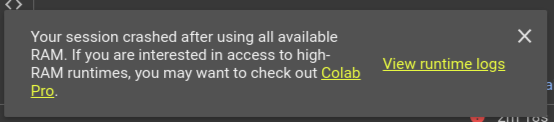

## 3. Como resolver o problema de memória RAM insuficiente?

**3.1 Aumentar a memória *swap* (swp) do computador**

Quando realizamos análises de dados em arquivos muito grandes, a leitura desses arquivos pode se tornar um desafio, pois muitas vezes não temos memória RAM suficiente para lidar com todo o conjunto de dados de uma só vez. Nesses casos, podemos recorrer à memória swap do computador, que é um espaço em disco usado para armazenar temporariamente informações da memória RAM quando esta atinge sua capacidade máxima. Ao utilizar a memória swap, podemos reduzir a pressão na memória RAM e permitir a leitura do arquivo CSV em partes menores e mais gerenciáveis. É importante lembrar que o uso da memória swap pode tornar a leitura de dados mais lenta, devido ao tempo de acesso ao disco rígido, porém, pode ser uma solução útil para lidar com arquivos muito grandes em computadores com limitações de memória RAM.

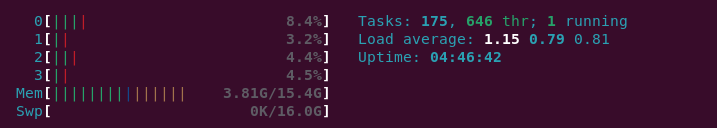

**3.2 Leitura do arquivo CSV em lotes e selecionando apenas as colunas realmente necessárias**

Uma técnica bastante útil para lidar com arquivos grandes é a leitura em blocos (ou *chunking*). Ao invés de ler o arquivo todo de uma vez, o arquivo é lido em pequenos pedaços, também conhecidos como blocos, que cabem na memória RAM disponível. Além disso, para otimizar ainda mais o uso da memória RAM, é possível selecionar apenas as colunas necessárias para a análise de dados. Dessa forma, é possível processar grandes conjuntos de dados sem sobrecarregar a memória RAM, garantindo uma leitura e análise mais eficientes.

**3.3 Utilização de mais de uma linguagem de programação**

Para quem está acostumado às distribuições Linux, sabe que a linguagem de programação *Shell Script* é uma grande aliada no dia a dia dos cientistas de dados. Apesar do escopo desta linguagem não ser a análise de dados, com ela, é possível fazer um pré-tratamento do arquivo CSV, visando selecionar apenas as colunas de interesse e, consequentemente, diminuindo o tamanho deste arquivo. Logo, sendo possível usar o *Python* na etapa posterior já com o arquivo modificado.

### Shell Script

*Shell Script* é uma linguagem de programação simples usada em sistemas operacionais semelhantes ao Unix, como o Linux e o macOS. Ele permite que os usuários criem scripts para executar várias tarefas, como automatizar a execução de comandos, gerenciar arquivos e diretórios e configurar o ambiente do sistema operacional. Com shell script, é possível automatizar tarefas rotineiras e complexas, o que pode economizar tempo e evitar erros humanos.

O comando "%%shell" indica que a linguagem a ser interpretada é a do *shell* do sistema operacional, permitindo executar comandos do Linux no ambiente do *notebook*. 

In [ ]:
## Identificando o arquivo no diretório de trabalho


# A execução desse código listará todos os arquivos com extensão ".CSV" no 
# diretório atual


%%shell

ls *.csv

SoU_censo_aluno_2019.csv


In [ ]:
## Instalação do pacote bc

# O código abaixo é um comando da linguagem instala o pacote "bc" 
# usando o gerenciador de pacotes apt-get, sem a necessidade de confirmação (-y). 
# O "bc" é uma calculadora de precisão arbitrária, que pode ser útil em algumas 
# tarefas de programação. Neste código, o bloco else que exibe a mensagem 
# "bc já está instalado" caso o comando bc seja encontrado no sistema. Dessa 
# forma, as mensagens após a instalação da biblioteca bc serão omitidas caso 
# ela já esteja instalada.

%%shell

# Verifica se o bc está instalado
if ! [ -x "$(command -v bc)" ]; then
  echo 'Erro: bc não está instalado.' >&2
  echo 'Instalando bc ...'
  sudo apt-get update
  sudo apt-get install bc -y
else
  echo 'bc já está instalado.'
fi

bc já está instalado.


In [ ]:
## Identificando o tamanho do arquivo


# Este código realiza algumas operações para obter o tamanho em gigabytes (GB) de 
# um arquivo cujo caminho é definido na variável "caminho_arquivo". Primeiro, ele 
# usa o comando "basename" para extrair apenas o nome do arquivo (sem o caminho 
# completo) e armazená-lo na variável "nome_arquivo". Em seguida, ele usa o comando 
# "wc" para contar o número de bytes do arquivo e o redireciona para o comando "awk", 
# que extrai apenas o número de bytes e armazena-o na variável "tamanho_arquivo". 
# Depois, ele usa o comando "echo" com a opção "-e" para imprimir uma mensagem na 
# com o nome e o tamanho do arquivo em GB, utilizando a ferramenta "bc" para realizar 
# a operação de conversão. O resultado final é a impressão de uma mensagem na tela 
# informando o tamanho do arquivo em GB.


%%shell

caminho_arquivo="./SoU_censo_aluno_2019.csv"

nome_arquivo=$(basename $caminho_arquivo)

tamanho_arquivo=$(wc -c $caminho_arquivo | awk '{print $1}')

tamanho_arquivo_gb=$(echo "scale=2; $tamanho_arquivo/(1024*1024*1024)" | bc)

echo -e "O tamanho do arquivo \e[32m$nome_arquivo\e[0m é \e[32m${tamanho_arquivo_gb} GB\e[0m."

O tamanho do arquivo SoU_censo_aluno_2019.csv é 2.88 GB.


**3.2 Número de linhas e colunas**

O conhecimento do número de linhas e colunas é fundamental para análise de dados em arquivos CSV, pois permite aos usuários estimar a quantidade de memória necessária para carregar os dados em um ambiente de computação. Além disso, saber o número de linhas e colunas ajuda a definir o melhor tamanho de lote para processamento em lotes de dados, o que pode melhorar significativamente o desempenho de leitura e escrita do arquivo. Portanto, a obtenção do número de linhas e colunas é um passo crucial para qualquer análise de dados em um arquivo CSV.

In [ ]:
## Identificando o número de linhas e colunas


# O código a seguir atribui o caminho do arquivo CSV a uma variável chamada caminho_arquivo, 
# em seguida usa o comando "basename" para obter somente o nome do arquivo (sem o caminho). 
# Em seguida, é utilizado o comando "wc -l" para contar o número de linhas do arquivo 
# e atribuí-lo à variável "linhas". Para contar o número de colunas, é usado o comando 
# "awk" para identificar o número de campos separados por '|' em cada linha e retornar 
# o maior número de campos. Esse número é atribuído à variável "colunas". Por fim, o 
# código exibe uma mensagem informando o nome do arquivo, o número de linhas e o 
# número de colunas.


%%shell

caminho_arquivo="./SoU_censo_aluno_2019.csv"

nome_arquivo=$(basename $caminho_arquivo)

linhas=$(wc -l < $caminho_arquivo)

colunas=$(awk -F'|' '{if (NF>m) m=NF} END{print m}' $caminho_arquivo)

echo -e "O arquivo \e[32m$nome_arquivo\e[0m tem \e[32m$linhas\e[0m linhas e \e[32m$colunas\e[0m colunas."

O arquivo SoU_censo_aluno_2019.csv tem 12350833 linhas e 105 colunas.


**3.3 Visualizar as primeiras n linhas**

Mostrar as primeiras n linhas de um arquivo CSV é uma prática comum e essencial na análise de dados. Isso porque a visualização inicial das primeiras linhas pode fornecer informações valiosas sobre a estrutura do arquivo, como os nomes das colunas, os tipos de dados e a presença de valores nulos. Além disso, a visualização das primeiras linhas pode ajudar a identificar possíveis problemas de codificação ou separação de valores, o que pode afetar diretamente a qualidade dos resultados da análise. Portanto, é importante sempre visualizar as primeiras n linhas antes de prosseguir com a análise de dados.

In [ ]:
## Identificando as n primeiras linhas do arquivo CSV


# Este código mostra as primeiras n linhas e as primeiras N colunas de um arquivo 
# CSV, utilizando a ferramenta awk para formatar e imprimir os dados. A primeira 
# linha do código define o caminho do arquivo, o número de linhas e o número de 
# colunas que serão mostrados. A seguir, o comando "echo" imprime uma mensagem 
# indicando o número de linhas e colunas que serão exibidos, juntamente com o 
# nome do arquivo.

# Em seguida, é utilizado o comando "head" para obter as primeiras n linhas do 
# arquivo CSV. Esses dados são processados pelo awk, que define uma variável "sep" 
# para imprimir o separador da tabela, composto por uma linha contendo o caracter 
# "+", seguido por uma linha com o cabeçalho das colunas formatadas com o sprintf.

# O awk então itera por todas as linhas do arquivo CSV e cria uma variável "row" 
# contendo os dados formatados para cada coluna. A variável "data" armazena essas 
# linhas formatadas. No final, o awk imprime a linha separadora, seguida do cabeçalho 
# das colunas e, em seguida, as linhas de dados armazenadas na variável "data", 
# respeitando o limite de n linhas especificado.
# comment


%%shell

caminho_arquivo="./SoU_censo_aluno_2019.csv"

n=10 # número de linhas

N=15 # número de colunas

echo -e "As primeiras \e[32m$n\e[0m linhas e \e[32m$N\e[0m colunas do arquivo \e[32m$(basename $caminho_arquivo)\e[0m são:\n"

head -$n $caminho_arquivo | awk -F "|" -v n="$n" -v N="$N" '
  NR == 1 {
    sep = "+"
    for (i = 1; i <= NF && i <= N; i++) {
      header[i] = sprintf(" %-20.20s |", $i)
      sep = sep "--------------------+"
    }
  }
  {
    row = "|"
    for (i = 1; i <= NF && i <= N; i++) {
      row = row sprintf(" %-20.20s |", $i)
    }
    data[NR] = row
  }
  END {
    print sep
    for (i = 1; i <= NF && i <= N; i++) {
      printf "%s", header[i]
    }
    printf "\n%s\n", sep
    for (j = 2; j <= NR && j <= n + 1; j++) {
      print data[j]
    }
    print sep
  }'
  

As primeiras 10 linhas e 15 colunas do arquivo SoU_censo_aluno_2019.csv são:

+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
 NU_ANO_CENSO         | CO_IES               | TP_CATEGORIA_ADMINIS | TP_ORGANIZACAO_ACADE | CO_CURSO             | CO_CURSO_POLO        | TP_TURNO             | TP_GRAU_ACADEMICO    | TP_MODALIDADE_ENSINO | TP_NIVEL_ACADEMICO   | CO_CINE_ROTULO       | ID_ALUNO             | CO_ALUNO_CURSO       | CO_ALUNO_CURSO_ORIGE | TP_COR_RACA          |
+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+------

**3.4 Nome das colunas**

Visualizar o nome das primeiras colunas de um arquivo CSV é uma etapa crucial na análise de dados. Os nomes das colunas são a base para a compreensão dos dados contidos no arquivo, pois permitem identificar quais variáveis estão sendo medidas e como estão organizadas. Quando os nomes das colunas estão corretamente apresentados, a interpretação dos dados é mais precisa e eficiente, evitando erros e retrabalhos na análise. Portanto, garantir que o nome das primeiras colunas de um arquivo CSV sejam exibidos de forma clara e organizada é fundamental para uma boa análise de dados.

In [ ]:
## Identificando o nome das colunas


# Este código mostra as colunas do arquivo CSV. A variável caminho_arquivo contém 
# o caminho do arquivo que será lido. A partir disso, o comando head é utilizado 
# para obter apenas a primeira linha do arquivo, que contém o nome das colunas 
# separadas por '|'. Em seguida, o comando tr é utilizado para substituir o separador '|' 
# por quebras de linha, a fim de que cada nome de coluna fique em uma linha separada. 
# Por fim, o comando echo é utilizado para imprimir a mensagem com o nome do arquivo 
# e a lista de colunas obtida.


%%shell

caminho_arquivo="./SoU_censo_aluno_2019.csv"

colunas=$(head -n1 $caminho_arquivo | tr '|' '\n')

echo -e "As colunas do arquivo \e[32m$(basename $caminho_arquivo)\e[0m são:\n\n$colunas"

As colunas do arquivo SoU_censo_aluno_2019.csv são:

NU_ANO_CENSO
CO_IES
TP_CATEGORIA_ADMINISTRATIVA
TP_ORGANIZACAO_ACADEMICA
CO_CURSO
CO_CURSO_POLO
TP_TURNO
TP_GRAU_ACADEMICO
TP_MODALIDADE_ENSINO
TP_NIVEL_ACADEMICO
CO_CINE_ROTULO
ID_ALUNO
CO_ALUNO_CURSO
CO_ALUNO_CURSO_ORIGEM
TP_COR_RACA
TP_SEXO
NU_ANO_NASCIMENTO
NU_MES_NASCIMENTO
NU_DIA_NASCIMENTO
NU_IDADE
TP_NACIONALIDADE
CO_PAIS_ORIGEM
CO_UF_NASCIMENTO
CO_MUNICIPIO_NASCIMENTO
IN_DEFICIENCIA
IN_DEFICIENCIA_AUDITIVA
IN_DEFICIENCIA_FISICA
IN_DEFICIENCIA_INTELECTUAL
IN_DEFICIENCIA_MULTIPLA
IN_DEFICIENCIA_SURDEZ
IN_DEFICIENCIA_SURDOCEGUEIRA
IN_DEFICIENCIA_BAIXA_VISAO
IN_DEFICIENCIA_CEGUEIRA
IN_DEFICIENCIA_SUPERDOTACAO
IN_TGD_AUTISMO
IN_TGD_SINDROME_ASPERGER
IN_TGD_SINDROME_RETT
IN_TGD_TRANSTOR_DESINTEGRATIVO
TP_SITUACAO
QT_CARGA_HORARIA_TOTAL
QT_CARGA_HORARIA_INTEG
DT_INGRESSO_CURSO
IN_INGRESSO_VESTIBULAR
IN_INGRESSO_ENEM
IN_INGRESSO_AVALIACAO_SERIADA
IN_INGRESSO_SELECAO_SIMPLIFICA
IN_INGRESSO_OUTRO_TIPO_SELECAO
IN_INGRESSO_VAGA_REMANESC

**3.5 Novo arquivo CSV a partir de um subconjunto de colunas**

A geração de um arquivo CSV a partir de um subconjunto de colunas é uma tarefa comum na análise de dados. Esse processo é importante porque muitas vezes temos arquivos CSV muito grandes, com muitas colunas, e nem sempre precisamos de todas elas para realizar a análise desejada. Além disso, a seleção das colunas específicas que são relevantes para a análise pode tornar o processo de análise mais eficiente e menos custoso em termos de recursos de processamento. 

In [ ]:
## Gerar um novo arquivo CSV


# Este código realiza a extração de quatro colunas específicas de um arquivo CSV de 
# entrada, "SUP_ALUNO_2019.CSV", e cria um novo arquivo CSV de saída, "df_aluno_2019.csv", 
# contendo apenas essas colunas. O código começa definindo quatro variáveis, NU_ANO_CENSO, 
# CO_CURSO, QT_CARGA_HORARIA_TOTAL e IN_APOIO_BOLSA_PERMANENCIA, que correspondem aos 
# nomes das colunas que serão extraídas.

# Em seguida, é criada uma variável chamada "cabecalho", que contém a primeira linha do 
# arquivo de entrada, que corresponde aos nomes das colunas. As variáveis c1, c2, c3 e c4 
# são definidas utilizando o comando awk, que procura o índice (posição) das colunas 
# especificadas pelas variáveis NU_ANO_CENSO, CO_CURSO, QT_CARGA_HORARIA_TOTAL e 
# IN_APOIO_BOLSA_PERMANENCIA no cabeçalho do arquivo de entrada.

# Por fim, é utilizado o comando awk para imprimir apenas as colunas selecionadas 
# (c1, c2, c3 e c4) do arquivo de entrada e salvar o resultado no arquivo de saída. 
# O parâmetro -F define o caractere delimitador das colunas do arquivo de entrada, 
# o -v define as variáveis que serão usadas pelo comando awk e o > redireciona a 
# saída do comando awk para o arquivo de saída.


%%shell

arquivo_entrada="./SoU_censo_aluno_2019.csv"
arquivo_saida="./df_aluno_2019.csv"

NU_ANO_CENSO="NU_ANO_CENSO"
CO_CURSO="CO_CURSO"
QT_CARGA_HORARIA_TOTAL="QT_CARGA_HORARIA_TOTAL"
IN_APOIO_BOLSA_PERMANENCIA="IN_APOIO_BOLSA_PERMANENCIA"

cabecalho=$(head -n 1 "$arquivo_entrada")
c1=$(echo "$cabecalho" | awk -F "|" '{for(i=1; i<=NF; i++) if($i=="'$NU_ANO_CENSO'") print i}')
c2=$(echo "$cabecalho" | awk -F "|" '{for(i=1; i<=NF; i++) if($i=="'$CO_CURSO'") print i}')
c3=$(echo "$cabecalho" | awk -F "|" '{for(i=1; i<=NF; i++) if($i=="'$QT_CARGA_HORARIA_TOTAL'") print i}')
c4=$(echo "$cabecalho" | awk -F "|" '{for(i=1; i<=NF; i++) if($i=="'$IN_APOIO_BOLSA_PERMANENCIA'") print i}')

awk -F "|" -v OFS="|" -v c1="$c1" -v c2="$c2" -v c3="$c3" -v c4="$c4" '{print $c1, $c2, $c3, $c4}' "$arquivo_entrada" > "$arquivo_saida"

In [ ]:
## Identificação dos arquivos de entrada e saída


# O comando "ls" é usado para listar o conteúdo de um diretório e o comando "grep" 
# é usado para pesquisar por padrões em um arquivo ou saída de comando. Nesse caso, 
# o comando "ls" lista o conteúdo do diretório atual e o comando "grep" é usado para 
# filtrar apenas os arquivos que contêm a palavra "aluno" (insensível a maiúsculas/minúsculas) 
# em seu nome. O resultado é uma lista de arquivos que contêm a palavra "aluno" em seu nome.


%%shell

ls | grep -i "aluno_2019"

df_aluno_2019.csv
SoU_censo_aluno_2019.csv


In [ ]:
## Identificando o tamanho do arquivo de saída


# Este código tem como objetivo mostrar o tamanho de um arquivo em MB ou GB, dependendo 
# do tamanho. Ele começa definindo a variável "caminho_arquivo" como o caminho para 
# o arquivo "df_aluno_2019.csv". Em seguida, ele usa a função "basename" para obter 
# somente o nome do arquivo, armazenado na variável "nome_arquivo". O tamanho do 
# arquivo é obtido através do comando "wc -c", que retorna o tamanho em bytes, 
# e o resultado é armazenado na variável "tamanho_arquivo".

# Depois disso, o código verifica se o tamanho do arquivo é maior que 102410241024 bytes, 
# o que corresponde a 1 GB. Se for, ele converte o tamanho para GB e armazena na variável 
# "tamanho_arquivo", e define a unidade como "GB". Caso contrário, o tamanho é convertido 
# para MB e armazenado na variável "tamanho_arquivo", e a unidade é definida como "MB". 
# Por fim, ele exibe a mensagem "O tamanho do arquivo [nome do arquivo] é [tamanho do arquivo] [unidade]" 
# em verde.


%%shell

caminho_arquivo="./df_aluno_2019.csv"

nome_arquivo=$(basename $caminho_arquivo)

tamanho_arquivo=$(wc -c $caminho_arquivo | awk '{print $1}')

if (( $tamanho_arquivo > 102410241024 )); then
  tamanho_arquivo=$(echo "scale=2; $tamanho_arquivo/(102410241024)" | bc)
  unidade="GB"
else
  tamanho_arquivo=$(echo "scale=2; $tamanho_arquivo/(1024*1024)" | bc)
  unidade="MB"
fi

echo -e "O tamanho do arquivo \e[32m$nome_arquivo\e[0m é \e[32m${tamanho_arquivo} ${unidade}\e[0m."

O tamanho do arquivo df_aluno_2019.csv é 211.77 MB.


In [ ]:
## Comparando o tamanho dos arquivos


# Este código compara o tamanho do arquivo de entrada "SUP_ALUNO_2019.CSV" com o 
# tamanho do arquivo de saída "df_aluno_2019.csv", ambos armazenados em variáveis. 
# Para obter o tamanho dos arquivos, utiliza-se o comando "stat -c%s" que retorna 
# o tamanho do arquivo em bytes. Em seguida, é calculada a porcentagem do tamanho 
# do arquivo de saída em relação ao tamanho do arquivo de entrada, utilizando a 
# expressão matemática "($saida_tamanho / $entrada_tamanho) * 100". O resultado é 
# exibido em uma mensagem no terminal, utilizando o comando "echo -e".


%%shell

arquivo_entrada="./SoU_censo_aluno_2019.csv"
arquivo_saida="./df_aluno_2019.csv"

entrada_tamanho=$(stat -c%s "$arquivo_entrada")
saida_tamanho=$(stat -c%s "$arquivo_saida")

porcentagem=$(echo "scale=2; ($saida_tamanho / $entrada_tamanho) * 100" | bc)

echo -e "O arquivo de saída \e[32m$(basename "$arquivo_saida")\e[0m possui apenas \e[32m$porcentagem%\e[0m do tamanho do arquivo de entrada \e[32m$(basename "$arquivo_entrada")\e[0m."

O arquivo de saída df_aluno_2019.csv possui apenas 7.00% do tamanho do arquivo de entrada SoU_censo_aluno_2019.csv.


In [ ]:
# Leitura do arquivo de saída por meio do Python

'''
Define a variável "caminho" como "./", ou seja, o diretório atual em que
o notebook está sendo executado.
'''

caminho = './'

'''
Este código lê um arquivo CSV chamado "df_aluno_2019.csv" usando o módulo pandas 
do Python. O caminho do arquivo é especificado por uma variável chamada "caminho". 
O separador de campo é definido como "|" e a codificação é definida como "utf8". 
O resultado é armazenado na variável "df_aluno_2019". Além disso, ele calcula o
tempo de execução do código e imprime uma mensagem com o valor em segundos.
'''

start_time = time.time()

df_aluno_2019 = pd.read_csv(caminho + 'df_aluno_2019.csv', sep = '|', encoding = 'utf8')

end_time = time.time()

execution_time = end_time - start_time

print("Tempo de execução:", round(execution_time,1), "segundos")

Tempo de execução: 3.3 segundos


In [ ]:
# Visualização das primeiras linhas do dataframe

df_aluno_2019.head()

,NU_ANO_CENSO,CO_CURSO,QT_CARGA_HORARIA_TOTAL,IN_APOIO_BOLSA_PERMANENCIA
0,2019,1,3700,NaN
1,2019,1,3700,NaN
2,2019,1,3700,NaN
3,2019,1,3700,NaN
4,2019,1,3700,NaN


### Python

**3.6 Selecionar as n primeiras colunas**

Remoção de colunas desnecessárias para reduzir o tamanho do arquivo e, consequentemente, a quantidade de memória necessária RAM para sua leitura.

In [ ]:
# o diretório atual em que o notebook está sendo executado
caminho = './'

# define o nome do arquivo a ser lido
filename = 'SoU_censo_aluno_2019.csv'
txt = Path(caminho + filename).resolve()

# define um valor máximo de colunas para o arquivo
n = 20 # valor máximo para este arquivo na versão gratuita do Google Colab  

# lê o arquivo CSV especificando o separador '|' e o encoding 'utf8', e usa somente as primeiras n colunas
df_aluno_2019 = pd.read_csv(txt, sep='|', encoding='utf8', usecols=range(n))

**3.7 Selecionar as colunas baseado numa lista**

Leitura apenas das colunas realmente necessárias, visando reduzir o tamanho do arquivo e, consequentemente, a quantidade de memória necessária RAM para sua leitura.

In [ ]:
# lista de colunas
cols = ['NU_ANO_CENSO', 'TP_CATEGORIA_ADMINISTRATIVA', 'TP_ORGANIZACAO_ACADEMICA', 'CO_CURSO', 'CO_CURSO_POLO', 
        'TP_TURNO', 'TP_GRAU_ACADEMICO', 'TP_MODALIDADE_ENSINO', 'TP_NIVEL_ACADEMICO', 'CO_CINE_ROTULO', 
        'IN_APOIO_TRANSPORTE', 'IN_ATIVIDADE_EXTRACURRICULAR', 'IN_COMPLEMENTAR_ESTAGIO', 'IN_COMPLEMENTAR_EXTENSAO', 
        'IN_COMPLEMENTAR_MONITORIA', 'IN_COMPLEMENTAR_PESQUISA', 'IN_BOLSA_ESTAGIO', 'IN_BOLSA_EXTENSAO', 
        'IN_BOLSA_MONITORIA', 'IN_BOLSA_PESQUISA']

# contagem do número de elementos contidos na lista
len(cols)

20

In [ ]:
# o diretório atual em que o notebook está sendo executado
caminho = './'

# define o nome do arquivo a ser lido
filename = 'SoU_censo_aluno_2019.csv'
txt = Path(caminho + filename).resolve()

# lê o arquivo CSV 'txt' com separador '|' e encoding UTF-8, e seleciona apenas as 
# colunas especificadas em 'cols' para criar o dataframe 'df_aluno_2019'
df_aluno_2019 = pd.read_csv(txt, sep='|', encoding='utf8', usecols=cols)

**3.8 Selecionar as n primeiras colunas e leitura de arquivo CSV por lotes**

O código a seguir realiza a leitura de um arquivo CSV com muitas linhas e seleciona apenas um número limitado de colunas, dividindo a leitura em lotes para evitar a sobrecarga de memória. Primeiramente, o caminho e nome do arquivo são definidos e o número máximo de colunas a serem selecionadas é estabelecido. Em seguida, o número total de linhas é contado para calcular o tamanho necessário do lote. Um dataframe vazio é criado e a leitura do arquivo é feita em lotes com o auxílio da biblioteca TQDM para exibir a barra de progresso e atualização da leitura. Após o término da leitura, o nome do dataframe é atribuído a uma variável externa e uma mensagem é exibida para informar a conclusão da operação.

In [ ]:
# o diretório atual em que o notebook está sendo executado
caminho = './'

# definir o caminho e nome do arquivo csv
nome_arquivo = 'SoU_censo_aluno_2019.csv'
txt = Path(caminho + nome_arquivo).resolve()

# definir o número de colunas para selecionar
n = 30  # valor máximo para este arquivo na versão gratuita Google Colab

# ler rapidamente o número de linhas
length = sum(1 for row in open(txt, 'r'))

# definir o tamanho do chunk
chunksize = 500000

# iniciar um dataframe vazio
df = pd.DataFrame()

# calcular o valor necessário de i
total_chunks = math.ceil(length / chunksize)

# logar com estilo usando typer
typer.secho(f"Caminho do arquivo: {txt}", fg="red", bold=True)
typer.secho(f"Total de linhas do arquivo CSV: {length}", fg="green", bold=True)

# contexto do tqdm
with tqdm.tqdm(total=length, desc="Percentual de lotes lidos: ") as bar:
    # enumerar chunks lidos sem low_memory (é massivo para o pandas atribuir precisamente os dtypes)
    for i, chunk in enumerate(pd.read_csv(txt, chunksize=chunksize, delimiter="|", usecols=range(n), low_memory=False)):
        
        # adicioná-lo a df
        df = df.append(other=chunk)
        
        # atualizar a barra de progresso do tqdm
        bar.update(chunksize)
        
        # sair do loop quando todas as linhas tiverem sido lidas
        if i == total_chunks - 1:
            break

# atribuir o nome do dataframe final como uma variável externa
nome = "alunos_2019"
globals()[f"df_{nome}"] = df

# finalmente, informar com uma mensagem amigável
typer.secho("\nFim da leitura dos lotes...", fg=typer.colors.BRIGHT_RED)
typer.secho(f"Número de linhas do dataframe: {len(df)}", fg="green", bold=True)

Caminho do arquivo: /content/drive/MyDrive/SoU_Ciencia/arquivos/SoU_censo_aluno/SoU_censo_aluno_2019.csv
Total de linhas do arquivo CSV: 12350833


Percentual de lotes lidos: : 12500000it [02:56, 70695.86it/s]



Fim da leitura dos lotes...
Número de linhas do dataframe: 12350832


**Durante a execução do código**

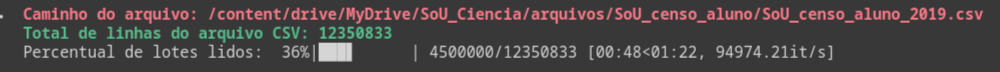

**3.9 Selecionar baseado numa lista de colunas e leitura de arquivo CSV por lotes**

O código a seguir realiza a leitura de um arquivo CSV com muitas linhas e seleciona apenas um número limitado de colunas, dividindo a leitura em lotes para evitar a sobrecarga de memória. Primeiro, é definido o caminho e o nome do arquivo a ser lido. Em seguida, é especificado quais colunas devem ser selecionadas. Depois, é feita uma leitura rápida do número de linhas do arquivo para que se possa calcular o número de lotes (partes do arquivo a serem lidas) necessários para ler o arquivo inteiro. É definido um tamanho de lote para que a leitura seja feita de forma eficiente. Um dataframe vazio é iniciado e os lotes do arquivo são lidos e adicionados a esse dataframe. O nome do dataframe final é atribuído a uma variável externa e, por fim, é exibida uma mensagem informando o número de linhas lidas e que a leitura dos lotes foi finalizada. O uso da biblioteca tqdm permite acompanhar o progresso da leitura do arquivo em tempo real.

In [ ]:
# o diretório atual em que o notebook está sendo executado
caminho = './'

# definir o caminho e nome do arquivo csv
nome_arquivo = 'SoU_censo_aluno_2019.csv'
txt = Path(caminho + nome_arquivo).resolve()

# definir as colunas a serem selecionadas (núm de cols <=30, valor máximo na versão gratuita Google Colab)
cols = ['NU_ANO_CENSO', 'TP_CATEGORIA_ADMINISTRATIVA', 'TP_ORGANIZACAO_ACADEMICA', 
        'CO_CURSO', 'CO_CURSO_POLO', 'TP_TURNO', 'TP_GRAU_ACADEMICO', 
        'TP_MODALIDADE_ENSINO', 'TP_NIVEL_ACADEMICO', 'CO_CINE_ROTULO', 
        'IN_APOIO_TRANSPORTE', 'IN_ATIVIDADE_EXTRACURRICULAR', 
        'IN_COMPLEMENTAR_ESTAGIO', 'IN_COMPLEMENTAR_EXTENSAO', 
        'IN_COMPLEMENTAR_MONITORIA', 'IN_COMPLEMENTAR_PESQUISA', 
        'IN_BOLSA_ESTAGIO', 'IN_BOLSA_EXTENSAO', 'IN_BOLSA_MONITORIA', 
        'IN_BOLSA_PESQUISA', 'TP_ESCOLA_CONCLUSAO_ENS_MEDIO', 
        'IN_ALUNO_PARFOR', 'TP_SEMESTRE_CONCLUSAO', 'TP_SEMESTRE_REFERENCIA']

# ler rapidamente o número de linhas
length = sum(1 for row in open(txt, 'r'))

# definir o tamanho do chunk
chunksize = 500000

# iniciar um dataframe vazio
df = pd.DataFrame()

# logar com estilo usando typer
typer.secho(f"Caminho do arquivo: {txt}", fg="red", bold=True)
typer.secho(f"Total de linhas do arquivo CSV: {length}", fg="green", bold=True)

# contexto do tqdm
with tqdm.tqdm(total=sum(1 for _ in open(txt, 'r')), desc="Percentual de lotes lidos: ") as bar:
    # ler chunks sem low_memory (é massivo para o pandas atribuir precisamente os dtypes)
    for chunk in pd.read_csv(txt, chunksize=chunksize, delimiter="|", usecols=cols, low_memory=False):
        
        # adicioná-lo a df
        df = df.append(other=chunk)
        
        # atualizar a barra de progresso do tqdm
        bar.update(chunksize)

# atribuir o nome do dataframe final como uma variável externa
nome = "alunos_2019"
globals()[f"df_{nome}"] = df

# finalmente, informar com uma mensagem amigável
typer.secho("\nFim da leitura dos lotes...", fg=typer.colors.BRIGHT_RED)
typer.secho(f"Número de linhas do dataframe: {len(df)}", fg="green", bold=True)

Caminho do arquivo: /content/drive/MyDrive/SoU_Ciencia/arquivos/SoU_censo_aluno/SoU_censo_aluno_2019.csv
Total de linhas do arquivo CSV: 12350833


Percentual de lotes lidos: : 12500000it [02:10, 95695.70it/s]


Fim da leitura dos lotes...
Número de linhas do dataframe: 12350832


**Durante a execução do código**

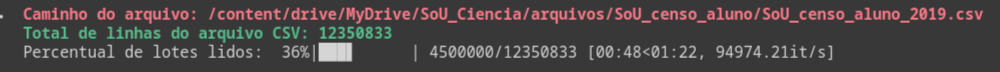

**3.10 Selecionar todas as colunas e leitura de arquivo CSV por lotes**

Este código lê um arquivo CSV grande, dividindo-o em blocos menores e salvando cada bloco em um dataframe vazio do Pandas. Primeiramente, o diretório atual é definido e o nome do arquivo CSV é especificado. Em seguida, é lido rapidamente o número total de linhas do arquivo CSV para que possa ser determinado o número necessário de blocos de leitura. É definido um tamanho para cada bloco e iniciado um dataframe vazio. O pandas é utilizado para ler o arquivo CSV em blocos usando o delimitador "|", adicionando cada bloco ao dataframe vazio. Uma barra de progresso é exibida com tqdm. O nome do dataframe resultante é atribuído como uma variável externa e é exibido uma mensagem informando que a leitura dos lotes foi concluída e o número de linhas do dataframe resultante.

In [ ]:
# Executável apenas se houver quantidade de memória RAM adequada

# definir o diretório atual onde o notebook está sendo executado
caminho = './'

# definir o caminho e nome do arquivo csv
nome_arquivo = 'SoU_censo_aluno_2019.csv'
txt = Path(caminho + nome_arquivo).resolve()

# ler rapidamente o número de linhas
length = sum(1 for row in open(txt, 'r'))

# definir um tamanho de bloco
chunksize = 500000

# iniciar um dataframe vazio
df = pd.DataFrame()

# calcular o valor necessário de i
total_chunks = math.ceil(length / chunksize)

# registro avançado com typer
typer.secho(f"Caminho do arquivo: {txt}", fg="red", bold=True)
typer.secho(f"Total de linhas do arquivo CSV: {length}", fg="green", bold=True)

# contexto tqdm
with tqdm.tqdm(total=length, desc="blocos lidos: ") as bar:
    # enumerar os blocos lidos sem low_memory (é enorme para o pandas atribuir precisamente os dtypes)
    for i, chunk in enumerate(pd.read_csv(txt, chunksize=chunksize, delimiter="|", low_memory=False)):
        
        # imprimir o número do bloco
        # print(i)
        
        # adicioná-lo ao dataframe
        df = df.append(other=chunk)
        
        # atualizar a barra de progresso do tqdm
        bar.update(chunksize)
        
        # sair do loop quando todas as linhas foram lidas
        if i == total_chunks - 1:
            break

# atribuir o nome do dataframe final como uma variável externa
nome = "alunos_2019"
globals()[f"df_{nome}"] = df
            
# finalmente informar com uma mensagem amigável
typer.secho("\nFim da leitura dos lotes...", fg=typer.colors.BRIGHT_RED)
typer.secho(f"Número de linhas do dataframe:{len(df)}", fg="green", bold=True)

**Durante a execução do código**

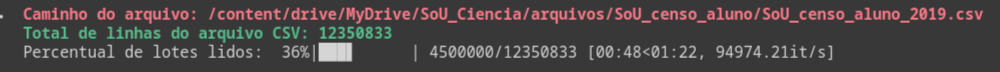

# Contato

Agradecemos todas as críticas e sugestões recebidas de pesquisadores e usuários que estão colaborando para a melhoria na qualidade da prestação das informações. 
Qualquer sugestão ou dúvida pode ser encaminhada para o e-mail <souciencia@unifesp.br>. 

# Obrigado

A equipe de Dados do SoU_Ciência elaborou este tutorial para auxiliar a todos os interessados em trabalhar com os nossos bancos de dados a terem um primeiro contato com o mundo das linguagens de programação. Contudo, para os mais experientes, este material ainda constitui um ótimo guia rápido de acesso à informação para o dia a dia, agilizando a rotina de trabalho dos Cientistas de Dados.

O SoU_Ciência deseja todo o sucesso em sua pesquisa e conte conosco ao longo desta incrível jornada.

In [ ]:
#@title
%%html

<marquee style='width: 60%;'>
    <b style='font-size: 30px;'>Sucesso!!!!</b>
</marquee>

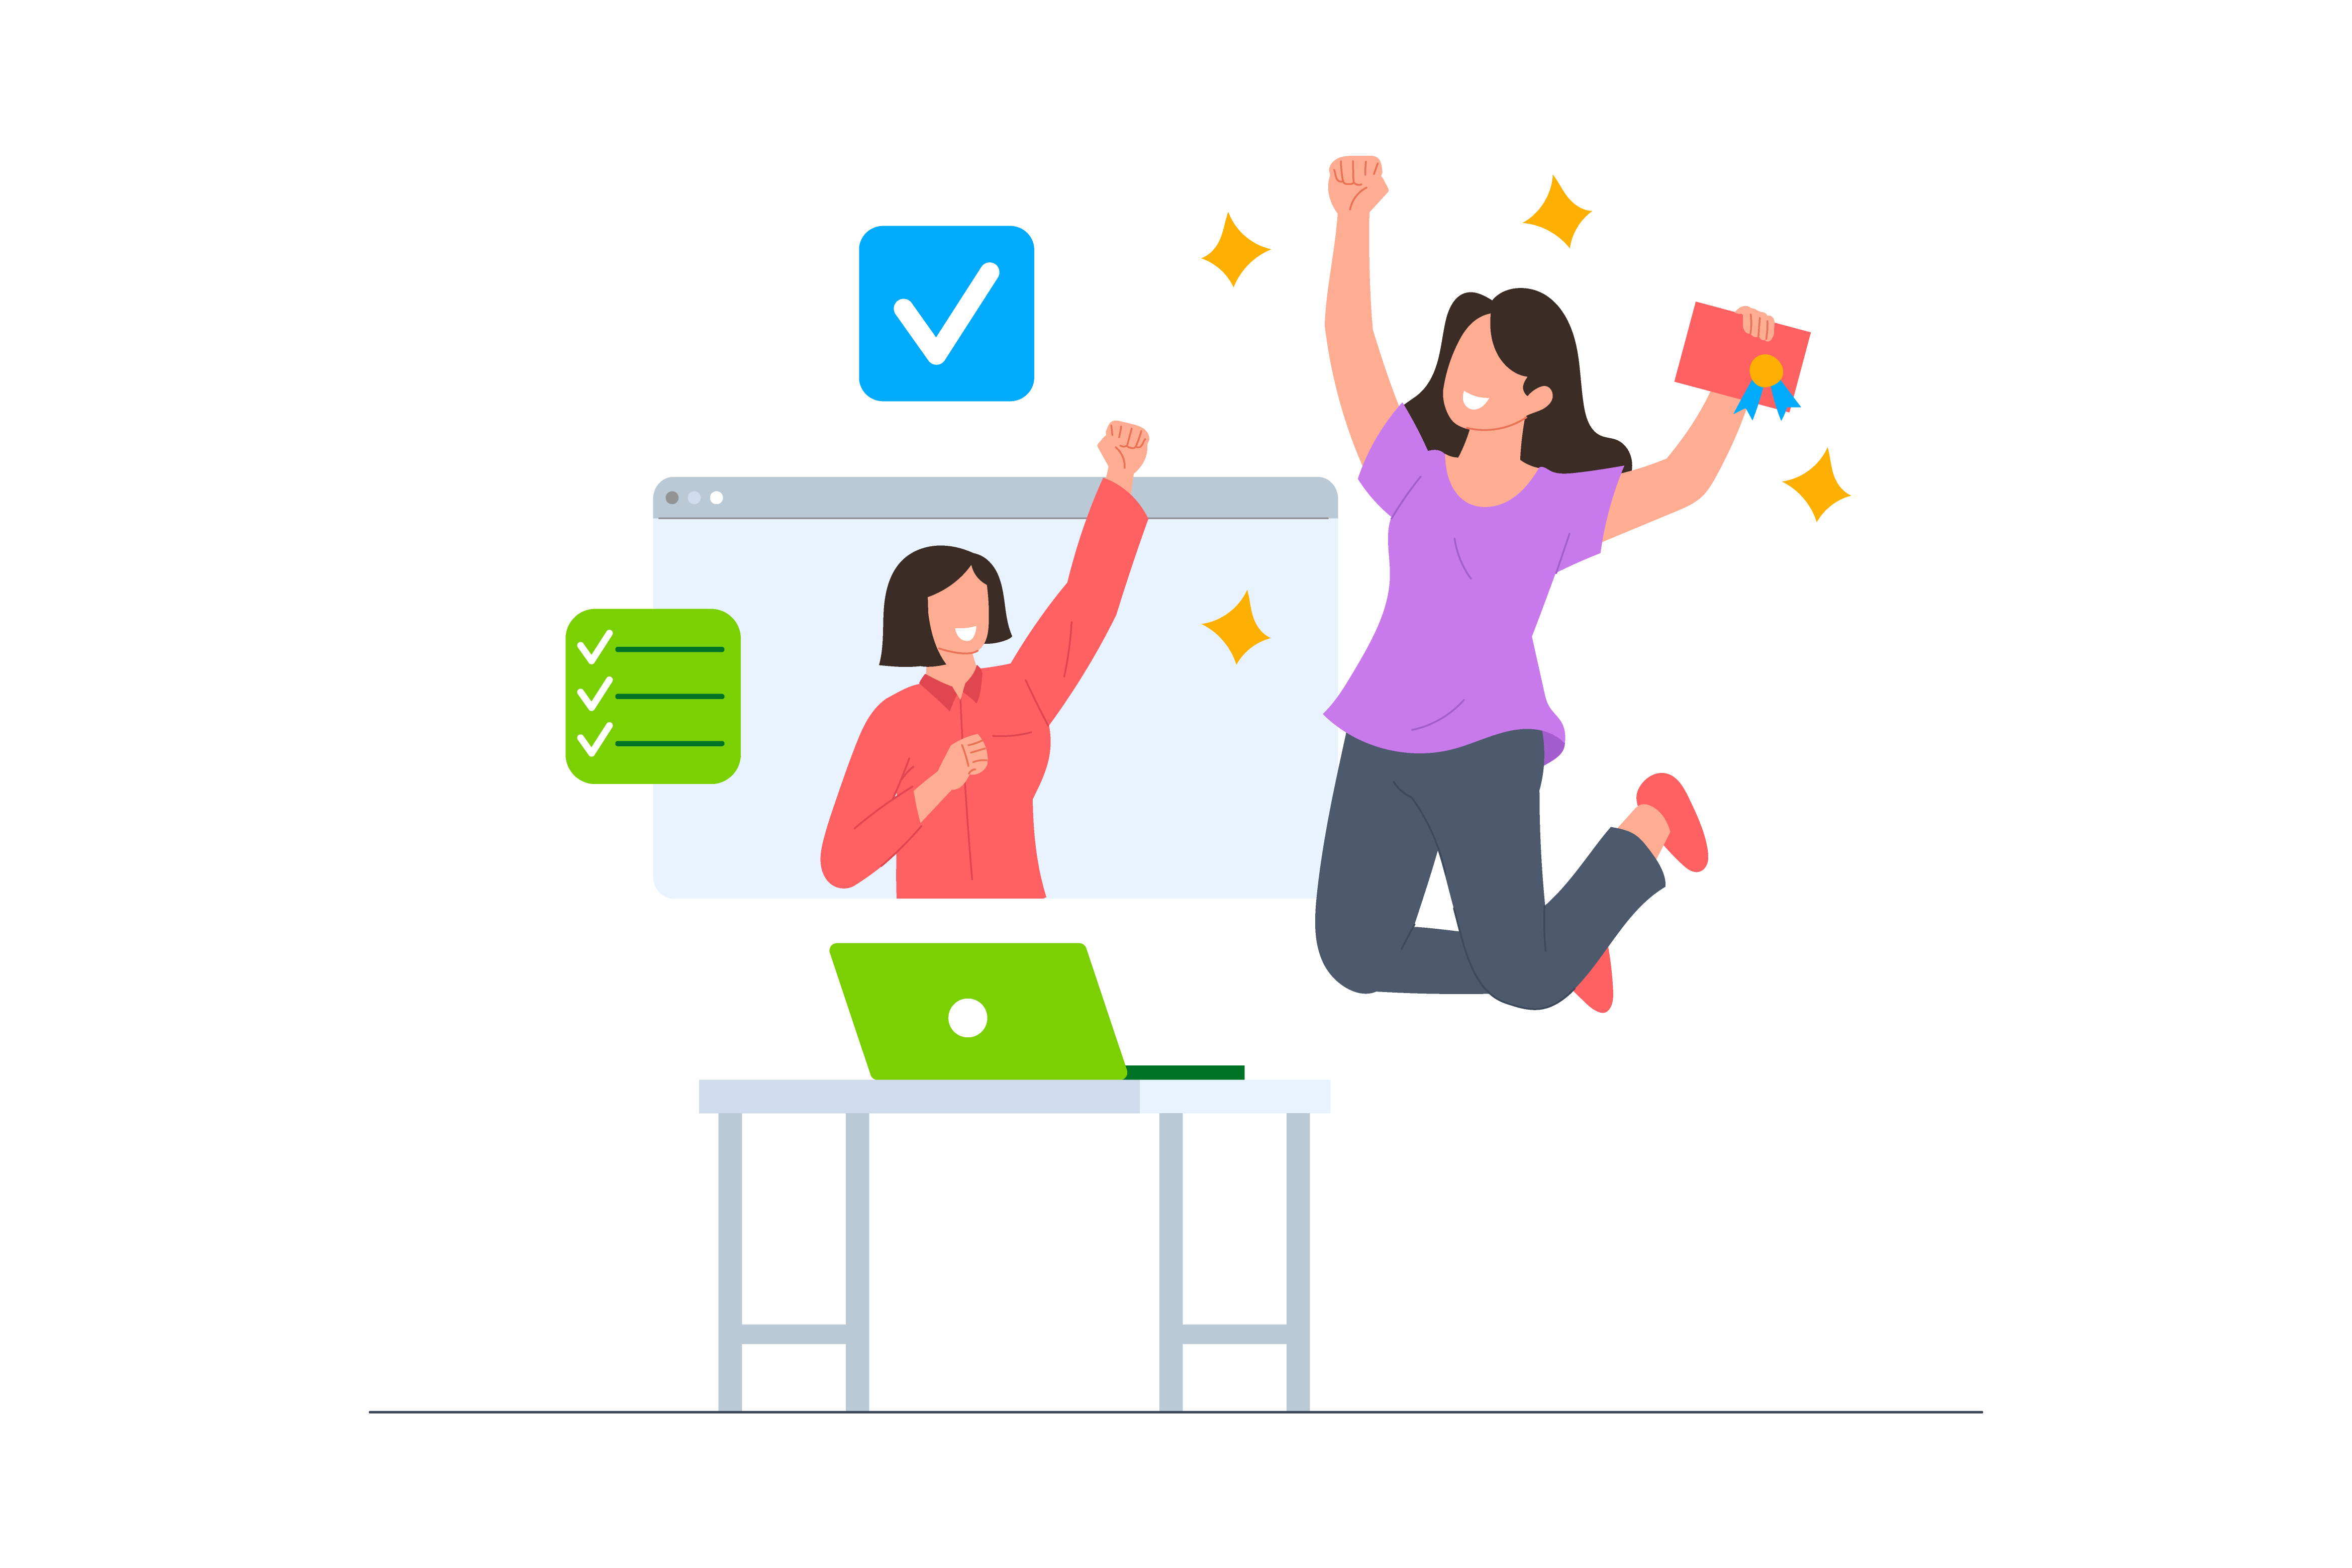